# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [141]:
# %pip install --upgrade plotly

### Import Statements

In [142]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [143]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [144]:
df_data = pd.read_csv('nobel_prize_data.csv')
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [145]:
df_data.shape

(962, 16)

In [146]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [147]:
df_data.sort_values(by='year').iloc[0]['year']
df_data.sort_values(by='year').iloc[-1]['year']

np.int64(2020)

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [148]:
df_data.duplicated().sum()

np.int64(0)

### Check for NaN Values

In [149]:
df_data.isna().values.any()
df_data[df_data.isna().any(axis=1)]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Germany,Male,NaN,NaN,NaN,DEU
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2019,Literature,The Nobel Prize in Literature 2019,“for an influential work that with linguistic ...,1/1,Individual,Peter Handke,1942-12-06,Griffen,Austria,Austria,Male,NaN,NaN,NaN,AUT
946,2019,Peace,The Nobel Peace Prize 2019,“for his efforts to achieve peace and internat...,1/1,Individual,Abiy Ahmed Ali,1976-08-15,Beshasha,Ethiopia,Ethiopia,Male,NaN,NaN,NaN,ETH
954,2020,Literature,The Nobel Prize in Literature 2020,“for her unmistakable poetic voice that with a...,1/1,Individual,Louise Glück,1943-04-22,"New York, NY",United States of America,United States of America,Female,NaN,NaN,NaN,USA
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR


In [150]:
df_data.info()
df_data['year'].count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

np.int64(962)

In [151]:
df_data.isna().sum().sort_values(ascending=False)

organization_name        255
organization_city        255
organization_country     254
motivation                88
birth_city                31
birth_date                28
birth_country_current     28
sex                       28
birth_country             28
ISO                       28
full_name                  0
laureate_type              0
year                       0
category                   0
prize_share                0
prize                      0
dtype: int64

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Birth Date to Datetime

In [152]:
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])
df_data.info()
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


#### Add a Column with the Prize Share as a Percentage

In [153]:
from fractions import Fraction

df_data['share_pct'] = df_data['prize_share'].apply(lambda x: float(Fraction(x)))

df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


In [154]:
separated_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df_data['share_pct1'] = numerator / denomenator
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,share_pct1
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50,0.50


In [155]:
a = "1/2"
n, d = a.split("/")
result = float(n) / float(d)
result

0.5

#### My questions: 
1. Any winners from Ukraine ('birth_country', 'birth_country_current', 'ISO')
2. At which age did they win? (min, max, avg)
3. sex VS category
4. sex VS timeline

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [156]:
by_gender = df_data.sex.value_counts()
by_gender

sex
Male      876
Female     58
Name: count, dtype: int64

In [157]:
df_gender = by_gender.reset_index()
df_gender.columns = ['sex', 'count']

fig = px.pie(
    df_gender, 
    names='sex', 
    values='count', 
    title="Prizes amount by gender",
    hole=0.6
)
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

In [158]:
df_count_gender = df_data.pivot_table(
    index='year',
    columns='sex',
    values='prize',           # or any column, just needs to exist
    aggfunc='count',
    fill_value=0
)
df_count_gender.head()

sex,Female,Male
year,,
1901,0,6
1902,0,7
1903,1,6
1904,0,5
1905,1,4


In [159]:
fig = px.line(
    df_count_gender, 
    x=df_count_gender.index, 
    y=['Male', 'Female'], 
    title="Timeline: prizes amount by gender")
fig.show()

In [160]:
# 'birth_country', 'birth_country_current', 'ISO'

df_data[df_data['birth_country'] == 'Ukraine']
df_data[df_data['birth_country_current'] == 'Ukraine']
df_data[(df_data['birth_country'] == 'Ukraine') | (df_data['birth_country_current'] == 'Ukraine') | (df_data['ISO'] == 'UKR')]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,share_pct1
45,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,Individual,Ilya Ilyich Mechnikov,1845-05-15,Kharkov (Kharkiv),Russian Empire (Ukraine),Ukraine,Male,Institut Pasteur,Paris,France,UKR,0.50,0.50
268,1952,Medicine,The Nobel Prize in Physiology or Medicine 1952,"""for his discovery of streptomycin, the first ...",1/1,Individual,Selman Abraham Waksman,1888-07-22,Priluka (Nova Pryluka),Russian Empire (Ukraine),Ukraine,Male,Rutgers University,"New Brunswick, NJ",United States of America,UKR,1.00,1.00
372,1966,Literature,The Nobel Prize in Literature 1966,"""for his profoundly characteristic narrative a...",1/2,Individual,Shmuel Yosef Agnon,1888-07-17,Buczacz (Buchach),Austria-Hungary (Ukraine),Ukraine,Male,NaN,NaN,NaN,UKR,0.50,0.50
517,1981,Chemistry,The Nobel Prize in Chemistry 1981,"""for their theories, developed independently, ...",1/2,Individual,Roald Hoffmann,1937-07-18,Zloczov,Poland (Ukraine),Ukraine,Male,Cornell University,"Ithaca, NY",United States of America,UKR,0.50,0.50
893,2015,Literature,The Nobel Prize in Literature 2015,"""for her polyphonic writings, a monument to su...",1/1,Individual,Svetlana Alexievich,1948-05-31,Ivano-Frankivsk,Ukraine,Ukraine,Female,NaN,NaN,NaN,UKR,1.00,1.00


In [161]:
# df_data.info()
df_data['age'] = df_data['year'] - df_data['birth_date'].dt.year
# type(df_data.iloc[0].birth_date.year)
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,share_pct1,age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,1.00,49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,1.00,62.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,1.00,47.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50,0.50,79.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50,0.50,73.00


In [162]:
age_counts = df_data.groupby('age').agg({'year': 'count'}).reset_index()
age_counts.rename(columns={'year':'count'}, inplace=True)
age_counts

,age,count
0,17.00,1
1,25.00,2
2,31.00,4
3,32.00,4
4,33.00,4
...,...,...
59,88.00,2
60,89.00,2
61,90.00,1
62,96.00,1


In [163]:
fig2 = px.bar(age_counts, x='age', y='count')
fig2.show()

In [164]:
fig3 = px.scatter(age_counts, x='age', y='count')
fig3.show()

In [165]:
category_counts = df_data.groupby('category').agg({'year':'count'}).reset_index()
category_counts.rename(columns={'year':'count'}, inplace=True)
category_counts.head()

,category,count
0,Chemistry,186
1,Economics,86
2,Literature,117
3,Medicine,222
4,Peace,135


In [166]:
categ_sex_counts = df_data.pivot_table(index='category', columns='sex', values='prize', aggfunc='count', fill_value=0)
categ_sex_counts.rename(columns={'sex':'count'}, inplace=True)
categ_sex_counts

sex,Female,Male
category,,
Chemistry,7,179
Economics,2,84
Literature,16,101
Medicine,12,210
Peace,17,90
Physics,4,212


In [167]:
df_data[(df_data['category'] == 'Peace') & (df_data['sex'] == 'Female')]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,share_pct1,age
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00,1.00,62.00
160,1931,Peace,The Nobel Peace Prize 1931,NaN,1/2,Individual,Jane Addams,1860-09-06,"Cedarville, IL",United States of America,United States of America,Female,NaN,NaN,NaN,USA,0.50,0.50,71.00
229,1946,Peace,The Nobel Peace Prize 1946,NaN,1/2,Individual,Emily Greene Balch,1867-01-08,"Jamaica Plain, MA (Boston)",United States of America,United States of America,Female,NaN,NaN,NaN,USA,0.50,0.50,79.00
468,1976,Peace,The Nobel Peace Prize 1976,NaN,1/2,Individual,Betty Williams,1943-05-22,Belfast,Northern Ireland,United Kingdom,Female,NaN,NaN,NaN,GBR,0.50,0.50,33.00
469,1976,Peace,The Nobel Peace Prize 1976,NaN,1/2,Individual,Mairead Corrigan,1944-01-27,Belfast,Northern Ireland,United Kingdom,Female,NaN,NaN,NaN,GBR,0.50,0.50,32.00
501,1979,Peace,The Nobel Peace Prize 1979,NaN,1/1,Organization,Mother Teresa,1910-08-26,Uskup (Skopje),Ottoman Empire (Republic of Macedonia),Republic of Macedonia,Female,NaN,NaN,NaN,MKD,1.00,1.00,69.00
534,1982,Peace,The Nobel Peace Prize 1982,NaN,1/2,Individual,Alva Myrdal,1902-01-31,Uppsala,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,0.50,0.50,80.00
618,1991,Peace,The Nobel Peace Prize 1991,"""for her non-violent struggle for democracy an...",1/1,Organization,Aung San Suu Kyi,1945-06-19,Rangoon (Yangon),Burma (Myanmar),Myanmar,Female,NaN,NaN,NaN,MMR,1.00,1.00,46.00
625,1992,Peace,The Nobel Peace Prize 1992,"""in recognition of her work for social justice...",1/1,Individual,Rigoberta Menchú Tum,1959-01-09,Aldea Chimel,Guatemala,Guatemala,Female,NaN,NaN,NaN,GTM,1.00,1.00,33.00
683,1997,Peace,The Nobel Peace Prize 1997,"""for their work for the banning and clearing o...",1/2,Individual,Jody Williams,1950-10-09,"Putney, VT",United States of America,United States of America,Female,NaN,NaN,NaN,USA,0.50,0.50,47.00


# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [168]:
df_data.sort_values(by='year')
a = df_data[df_data['sex'] == 'Female']
a.head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,share_pct1,age
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25,0.25,36.00
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00,1.00,62.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00,1.00,51.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [169]:
winners = df_data['full_name'].value_counts()
multiple_winners = winners[winners > 1]
multiple_winners

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Marie Curie, née Sklodowska                                                          2
John Bardeen                                                                         2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Frederick Sanger                                                                     2
Linus Carl Pauling                                                                   2
Name: count, dtype: int64

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [170]:
df_data['category'].nunique()
categ_count = df_data['category'].value_counts().reset_index()
categ_count.columns = ['category', 'count']
categ_count

,category,count
0,Medicine,222
1,Physics,216
2,Chemistry,186
3,Peace,135
4,Literature,117
5,Economics,86


In [171]:
fig3 = px.bar(categ_count, x='category', y='count', title="Number of Nobel prizes by category", color_continuous_scale="Aggrnyl", color='count')
fig3.update_layout(coloraxis_showscale=False)
fig3.show()

In [172]:
top_cat = categ_count.iloc[0]
top_cat
low_cat = categ_count.iloc[-1]
low_cat

category    Economics
count              86
Name: 5, dtype: object

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [173]:
df_data.sort_values(by='year')
df_data[df_data['category'] == 'Economics']
eco_1 = df_data[df_data['category'] == 'Economics'].iloc[0]
eco_1.year
eco_1.full_name

'Jan Tinbergen'

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [174]:
categ_sex_counts = df_data.pivot_table(index='category', columns='sex', values='prize', aggfunc='count', fill_value=0)
categ_sex_counts.rename(columns={'sex':'count'}, inplace=True)
categ_sex_counts

sex,Female,Male
category,,
Chemistry,7,179
Economics,2,84
Literature,16,101
Medicine,12,210
Peace,17,90
Physics,4,212


In [175]:
fig4 = px.bar(categ_sex_counts, x=categ_sex_counts.index, y=['Male','Female'], title="Split between men and women by category", color_continuous_scale="Aggrnyl")
fig4.update_layout(xaxis={'categoryorder':'total descending'})
fig4.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [176]:
prize_pyear = df_data.year.value_counts().sort_index().reset_index()
prize_pyear.columns = ['year', 'count']
prize_pyear

,year,count
0,1901,6
1,1902,7
2,1903,7
3,1904,6
4,1905,5
...,...,...
112,2016,11
113,2017,12
114,2018,13
115,2019,14


In [177]:
prize_pyear['rolling_avg'] = prize_pyear['count'].rolling(window=5).mean()
prize_pyear

,year,count,rolling_avg
0,1901,6,NaN
1,1902,7,NaN
2,1903,7,NaN
3,1904,6,NaN
4,1905,5,6.20
...,...,...,...
112,2016,11,11.60
113,2017,12,12.00
114,2018,13,12.00
115,2019,14,12.20


In [178]:
years_array_5 = np.arange(1900, 2021, step=5)
years_array_5

array([1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950,
       1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005,
       2010, 2015, 2020])

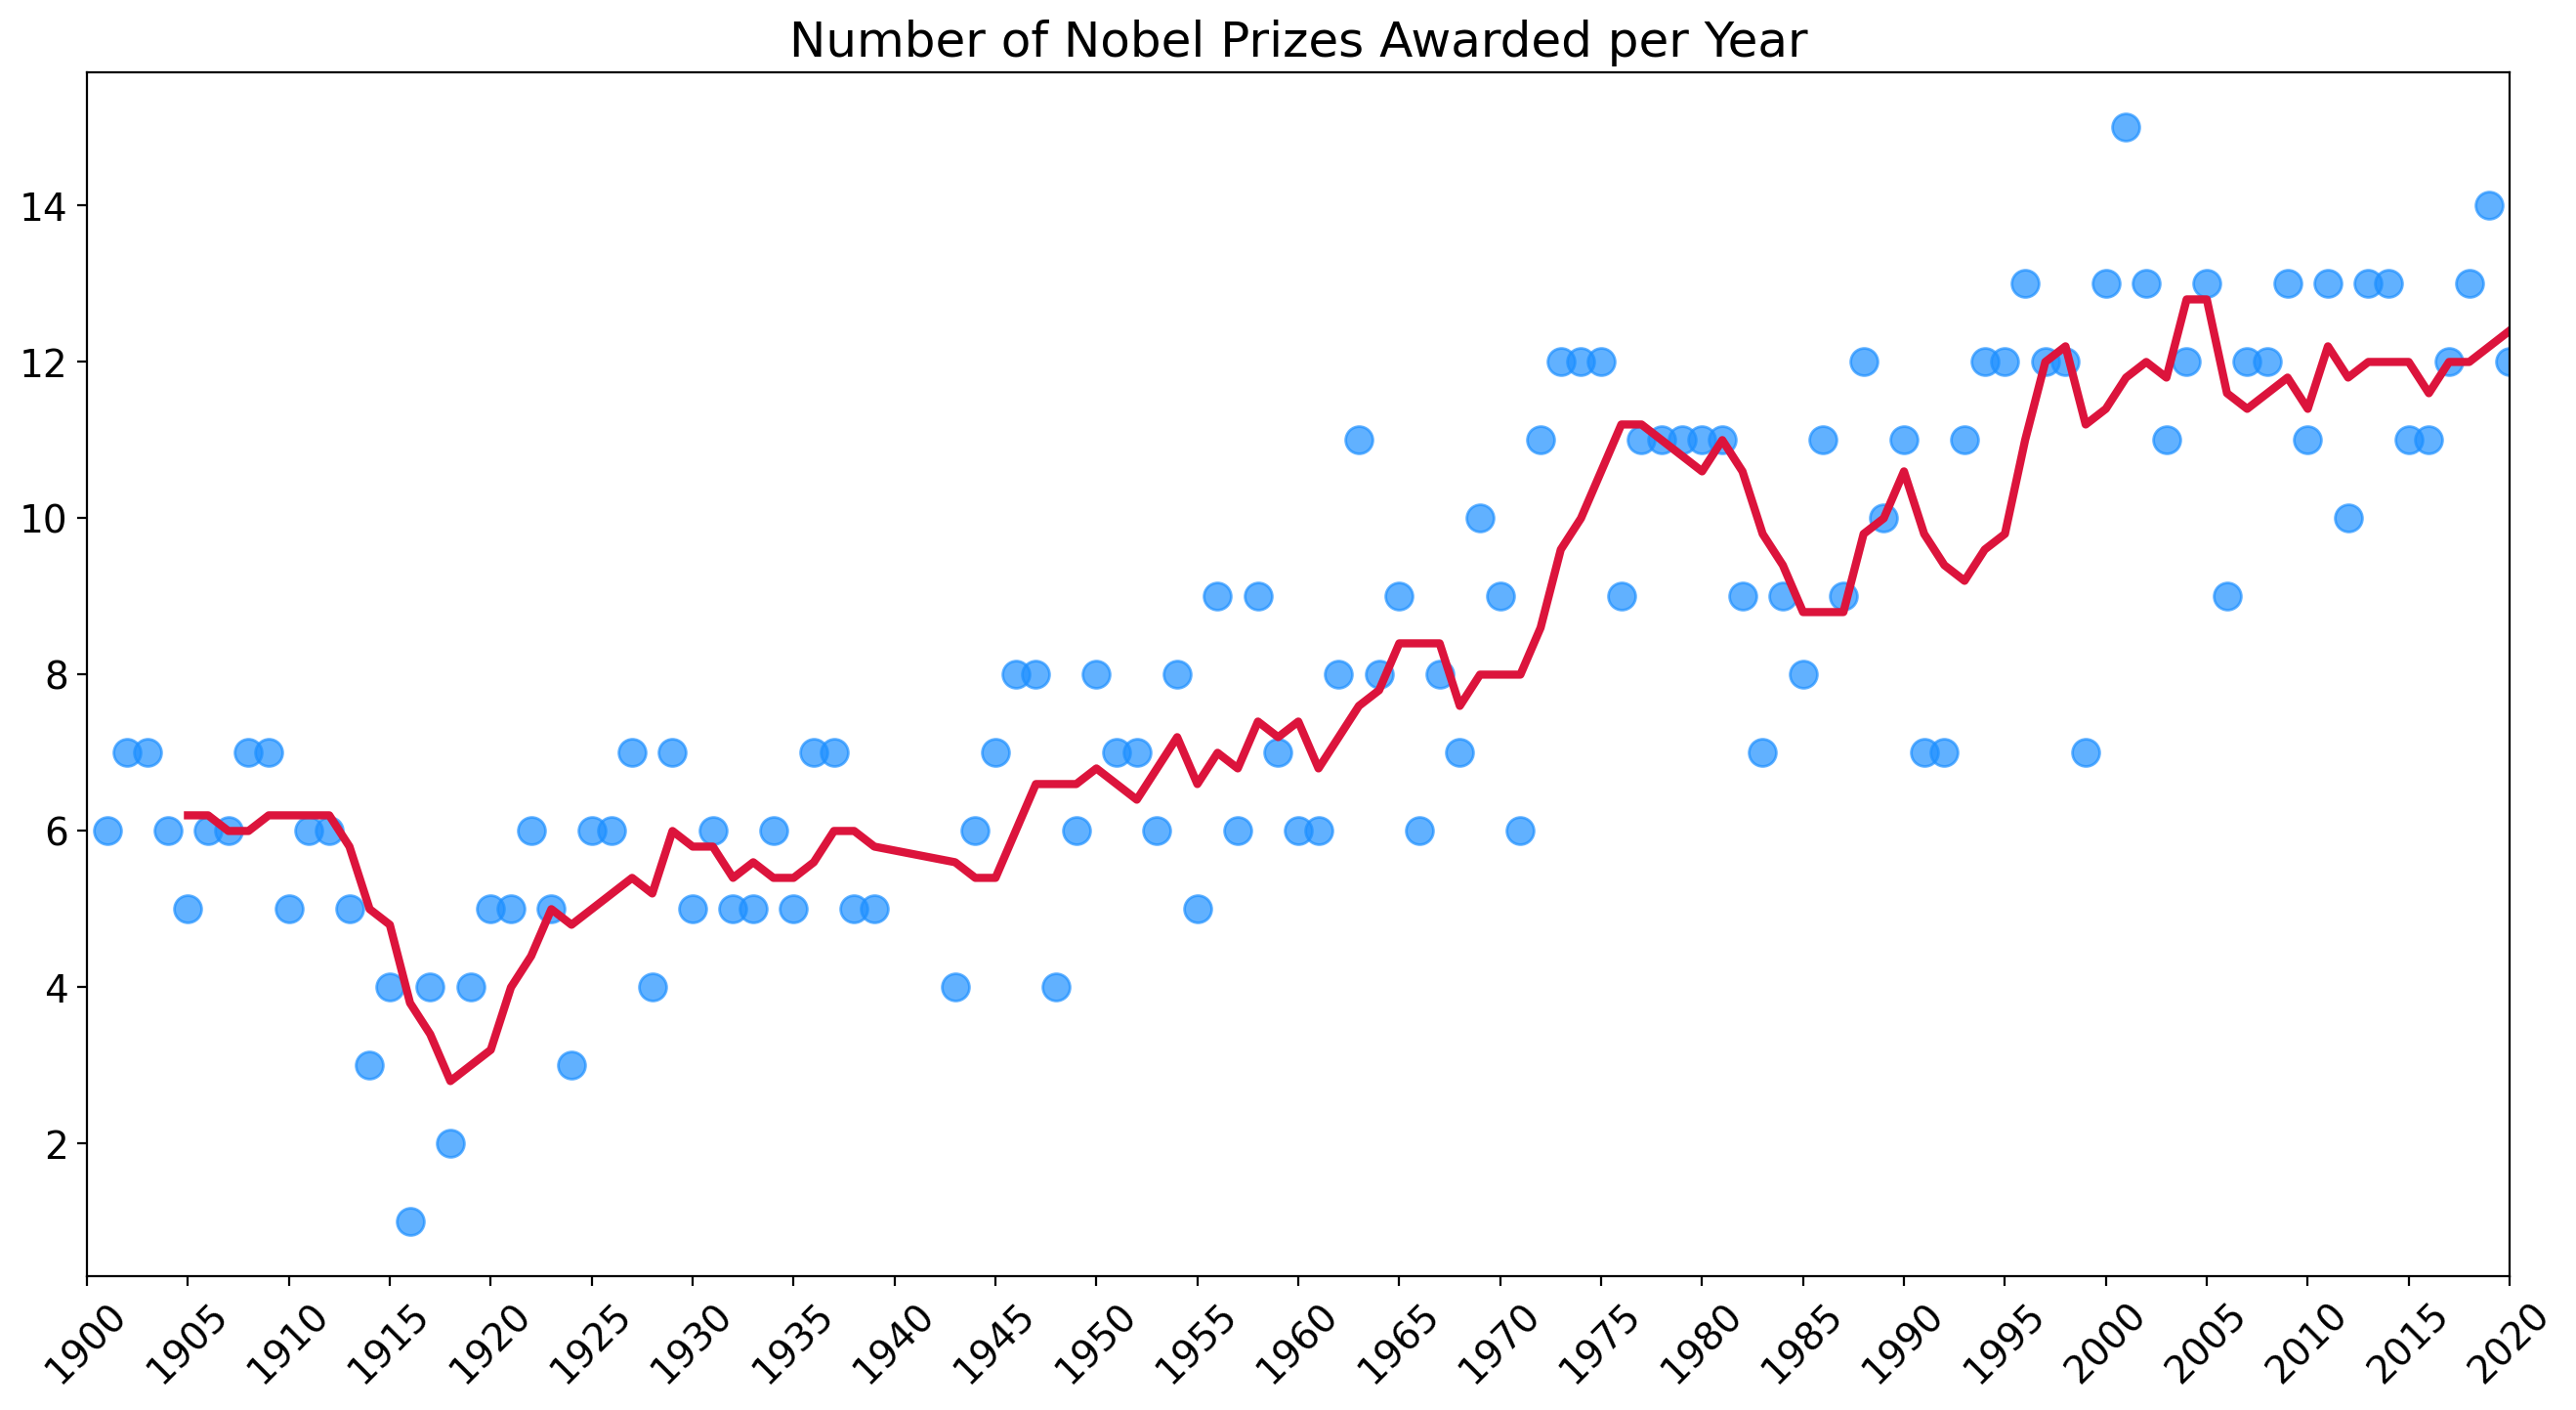

In [179]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)

ax = plt.gca()
ax.set_xlim(1900, 2020)

plt.scatter(x=prize_pyear.year, 
           y=prize_pyear['count'], 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
plt.plot(prize_pyear.year, 
        prize_pyear.rolling_avg, 
        c='crimson', 
        linewidth=3,)

plt.xticks(ticks=years_array_5, 
           fontsize=14, 
           rotation=45)
 
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [180]:
df_data.describe()

,year,birth_date,share_pct,share_pct1,age
count,962.00,934,962.00,962.00,934.00
mean,"1,971.82",1912-03-28 22:50:37.259100672,0.63,0.63,59.95
min,"1,901.00",1817-11-30 00:00:00,0.25,0.25,17.00
25%,"1,948.00",1892-04-06 00:00:00,0.33,0.33,51.00
50%,"1,977.00",1917-10-30 12:00:00,0.50,0.50,60.00
75%,"2,001.00",1937-04-24 18:00:00,1.00,1.00,69.00
max,"2,020.00",1997-07-12 00:00:00,1.00,1.00,97.00
std,33.81,NaN,0.29,0.29,12.62


In [181]:
share_year_df = df_data.groupby('year').agg({'share_pct': 'mean'}).reset_index()
share_year_df

,year,share_pct
0,1901,0.83
1,1902,0.71
2,1903,0.71
3,1904,0.83
4,1905,1.00
...,...,...
112,2016,0.55
113,2017,0.50
114,2018,0.46
115,2019,0.43


In [182]:
share_year_df['rolling_avg'] = share_year_df['share_pct'].rolling(window=5).mean()
share_year_df

,year,share_pct,rolling_avg
0,1901,0.83,NaN
1,1902,0.71,NaN
2,1903,0.71,NaN
3,1904,0.83,NaN
4,1905,1.00,0.82
...,...,...,...
112,2016,0.55,0.52
113,2017,0.50,0.50
114,2018,0.46,0.50
115,2019,0.43,0.50


Text(0, 0.5, 'Prize sharing')

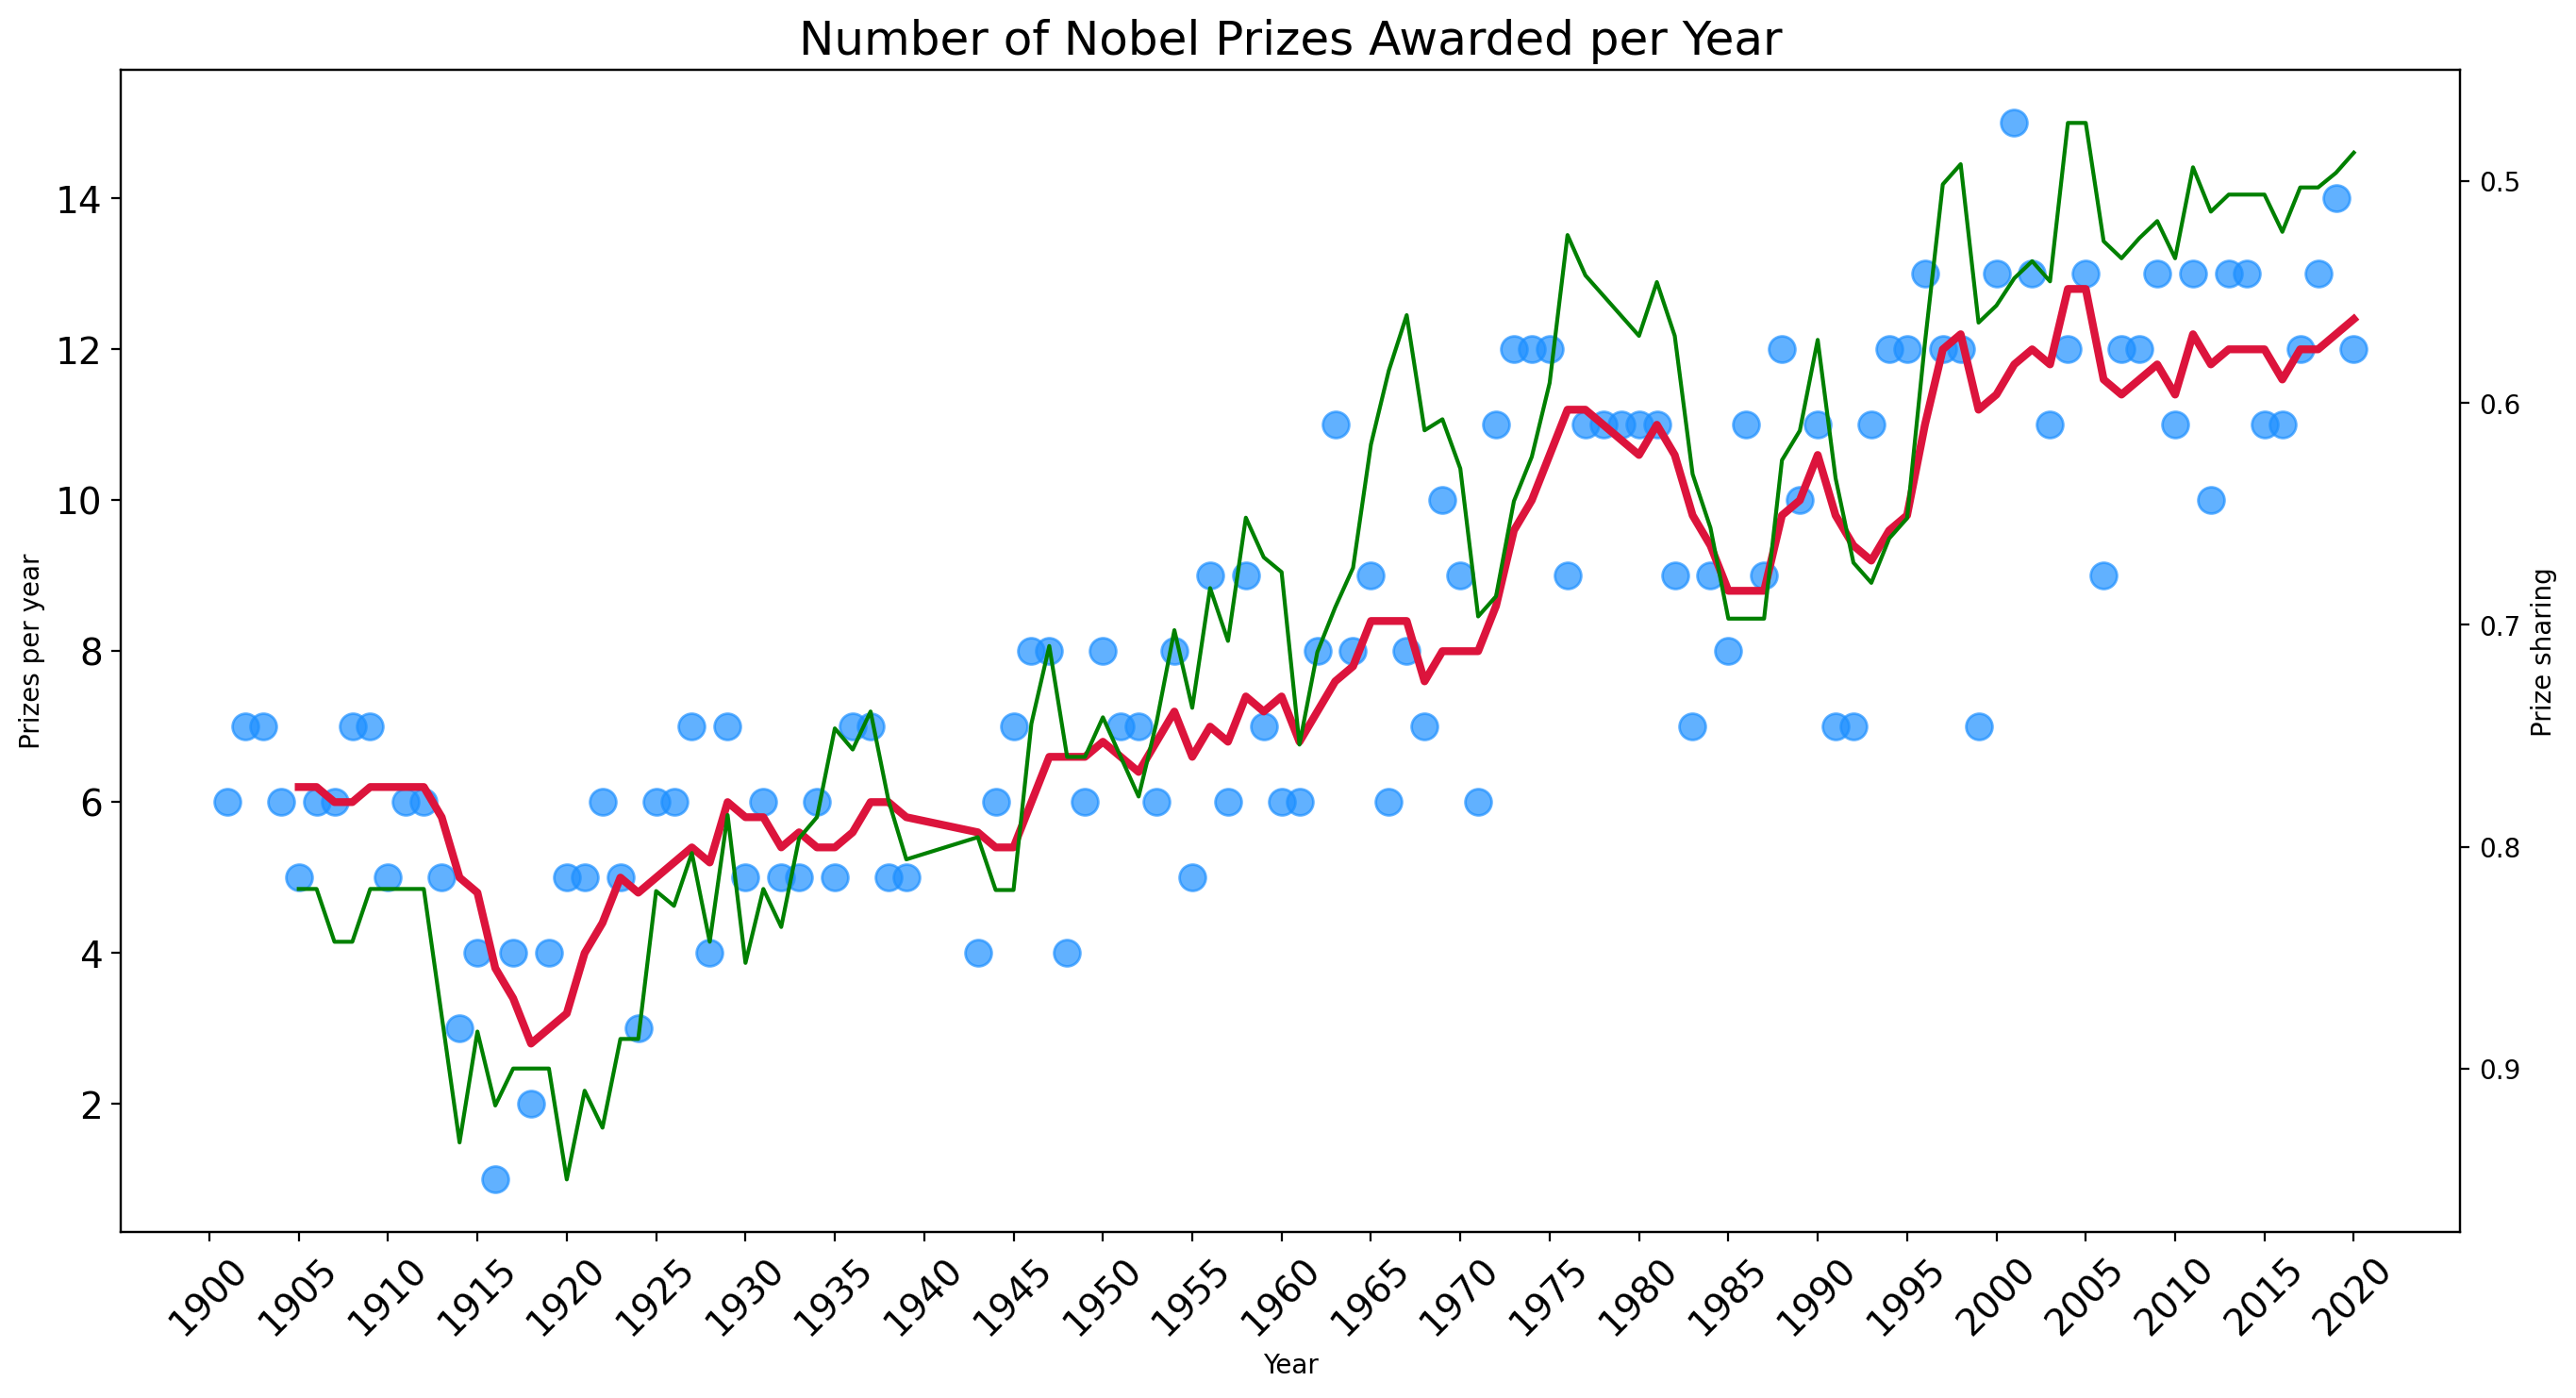

In [183]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=years_array_5, 
           fontsize=14, 
           rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.scatter(x=prize_pyear.year, 
           y=prize_pyear['count'], 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_pyear.year, 
        prize_pyear.rolling_avg, 
        c='crimson', 
        linewidth=3,)

ax2.plot(share_year_df.year, share_year_df.rolling_avg, c='g')

ax2.invert_yaxis()

ax1.set_xlabel('Year')
ax1.set_ylabel('Prizes per year')
ax2.set_ylabel('Prize sharing')


# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [184]:
top_countries1 = df_data.groupby('birth_country').agg({'prize': 'count'}).reset_index()
top_countries1.columns = ['birth_country', 'count']
top_countries1

,birth_country,count
0,Argentina,4
1,Australia,10
2,Austria,15
3,Austria-Hungary (Austria),1
4,Austria-Hungary (Bosnia and Herzegovina),1
...,...,...
119,Venezuela,1
120,Vietnam,1
121,W&uuml;rttemberg (Germany),1
122,West Germany (Germany),5


In [185]:
top_countries2 = df_data.groupby('birth_country_current').agg({'prize': 'count'}).reset_index()
top_countries2.columns = ['country', 'count']
top20_countries = top_countries2.sort_values(by='count', ascending=False)
top20_countries

,country,count
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29
...,...,...
63,Slovakia,1
75,Venezuela,1
76,Vietnam,1
77,Yemen,1


In [186]:
top_countries2b = df_data.groupby('ISO').agg({'prize': 'count'}).reset_index()
top_countries2b.columns = ['country', 'count']
top20_countries_iso = top_countries2b.sort_values(by='count', ascending=False)
top20_countries_iso

,country,count
73,USA,281
28,GBR,105
19,DEU,84
27,FRA,57
68,SWE,29
...,...,...
66,SVK,1
74,VEN,1
75,VNM,1
76,YEM,1


In [187]:
top_countries_chart = px.bar(data_frame=top20_countries[:20], x='count', y='country', orientation='h', title='Top countries', color_continuous_scale="Aggrnyl_r", color='count', width=1000, height=600)
top_countries_chart.update_layout(xaxis_title="A", yaxis_title="B", yaxis={'categoryorder' : 'total ascending'})
top_countries_chart.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [188]:
fig5 = px.choropleth(data_frame=top20_countries_iso, locations='country', color='count', hover_name='country', color_continuous_scale="Aggrnyl_r")
fig5.update_layout(margin=dict(l=0, r=0, t=0, b=0))
fig5.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [189]:
a = df_data.groupby('birth_country_current')['prize'].count().reset_index()
a.rename(columns={'prize': 'country_count'}, inplace=True)
a

,birth_country_current,country_count
0,Algeria,2
1,Argentina,4
2,Australia,10
3,Austria,18
4,Azerbaijan,1
...,...,...
74,United States of America,281
75,Venezuela,1
76,Vietnam,1
77,Yemen,1


In [190]:
country_categ_counts = df_data.groupby(['birth_country_current', 'category']).agg({'prize' : pd.Series.count}).reset_index()
country_categ_counts.rename(columns={'prize' : 'cat_count'}, inplace=True)
## OR:
# country_categ_counts = (
#     df_data
#     .groupby(['birth_country_current', 'category'])['prize']
#     .count()
#     .reset_index()
#     .rename(columns={'prize': 'cat_count'})
# )
country_categ_counts = country_categ_counts.merge(a, on='birth_country_current', how='left').sort_values(by='country_count', ascending=False)
country_categ_counts

,birth_country_current,category,cat_count,country_count
203,United States of America,Literature,10,281
201,United States of America,Chemistry,55,281
202,United States of America,Economics,49,281
204,United States of America,Medicine,78,281
205,United States of America,Peace,19,281
...,...,...,...,...
189,Trinidad,Literature,1,1
207,Venezuela,Medicine,1,1
208,Vietnam,Peace,1,1
209,Yemen,Peace,1,1


In [191]:
country_categ_counts.head(50)

,birth_country_current,category,cat_count,country_count
203,United States of America,Literature,10,281
201,United States of America,Chemistry,55,281
202,United States of America,Economics,49,281
204,United States of America,Medicine,78,281
205,United States of America,Peace,19,281
206,United States of America,Physics,70,281
196,United Kingdom,Economics,8,105
195,United Kingdom,Chemistry,27,105
200,United Kingdom,Physics,24,105
197,United Kingdom,Literature,7,105


In [192]:
fig6 = px.bar(country_categ_counts, x='cat_count', y='birth_country_current', title="Categories by country", color='category', orientation='h', width=1200, height=1000)
fig6.update_layout(yaxis={'categoryorder':'total ascending'}, xaxis_title='Number of Prizes', yaxis_title='Country', barmode='stack')
fig6.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [193]:
a = df_data.groupby('birth_country_current')['prize'].count().reset_index()
a.rename(columns={'prize': 'country_count'}, inplace=True)
a

,birth_country_current,country_count
0,Algeria,2
1,Argentina,4
2,Australia,10
3,Austria,18
4,Azerbaijan,1
...,...,...
74,United States of America,281
75,Venezuela,1
76,Vietnam,1
77,Yemen,1


In [194]:
b = df_data.groupby(['birth_country_current','year'], as_index=False)['prize'].count()
b = b.sort_values(by=['birth_country_current', 'year'])
b.rename(columns={'prize': 'country_count'}, inplace=True)
b['cumulative_count'] = b.groupby('birth_country_current')['country_count'].cumsum()
b.head(10)

,birth_country_current,year,country_count,cumulative_count
0,Algeria,1957,1,1
1,Algeria,1997,1,2
2,Argentina,1936,1,1
3,Argentina,1947,1,2
4,Argentina,1980,1,3
5,Argentina,1984,1,4
6,Australia,1915,1,1
7,Australia,1945,1,2
8,Australia,1960,1,3
9,Australia,1963,1,4


In [195]:
fig7 = px.line(data_frame=b, x='year', y='cumulative_count', color='birth_country_current', width=1200, height=1000)
fig7.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [196]:
top_org = df_data.groupby('organization_name').agg({'prize': 'count'}).reset_index()
top_org.columns = ['organization', 'count']
top_org = top_org.sort_values(by='count', ascending=False)
top_org

,organization,count
196,University of California,40
68,Harvard University,29
167,Stanford University,23
117,Massachusetts Institute of Technology (MIT),21
198,University of Chicago,20
...,...,...
217,University of Missouri,1
220,"University of Nottingham, School of Physics an...",1
224,University of Rochester,1
262,École Supérieure de Physique et Chimie,1


In [197]:
top_org[top_org['organization'] == 'University of Chicago']['count']

198    20
Name: count, dtype: int64

In [198]:
top_org_chart = px.bar(data_frame=top_org[:20], x='count', y='organization', orientation='h', title='Top organizations', color_continuous_scale="Aggrnyl_r", color='count', width=1000, height=600)
top_org_chart.update_layout(xaxis_title="A", yaxis_title="B", yaxis={'categoryorder' : 'total ascending'})
top_org_chart.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [199]:
org_cities = df_data.groupby('organization_city').agg({'prize': 'count'}).reset_index()
org_cities.columns = ['organization_city', 'count']
org_cities = org_cities.sort_values(by='count', ascending=False)
org_cities

,organization_city,count
34,"Cambridge, MA",50
121,"New York, NY",45
33,Cambridge,31
92,London,27
128,Paris,25
...,...,...
180,Weston Creek,1
182,"Woods Hole, MA",1
183,"Worcester, MA",1
184,Würzburg,1


In [200]:
org_cities_chart = px.bar(data_frame=org_cities[:20], x='count', y='organization_city', orientation='h', title='Top organization cities', color_continuous_scale="Aggrnyl_r", color='count', width=1000, height=600)
org_cities_chart.update_layout(xaxis_title="A", yaxis_title="B", yaxis={'categoryorder' : 'total ascending'})
org_cities_chart.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [201]:
birth_cities = df_data.groupby('birth_city').agg({'prize': 'count'}).reset_index()
birth_cities.columns = ['birth_city', 'count']
birth_cities = birth_cities.sort_values(by='count', ascending=False)
birth_cities

,birth_city,count
382,"New York, NY",53
418,Paris,26
313,London,19
572,Vienna,14
112,"Chicago, IL",12
...,...,...
625,Zusamaltheim,1
626,s Graveland,1
53,Blackpool,1
628,Ålesund,1


In [202]:
birth_cities_chart = px.bar(data_frame=birth_cities[:20], x='count', y='birth_city', orientation='h', title='Top birth cities', color_continuous_scale="Plasma_r", color='count', width=1000, height=600)
birth_cities_chart.update_layout(xaxis_title="A", yaxis_title="B", yaxis={'categoryorder' : 'total ascending'})
birth_cities_chart.show()

In [203]:
ny_share = birth_cities[birth_cities['birth_city'] == 'New York, NY']['count'].item() / a[a['birth_country_current'] == 'United States of America']['country_count'].item()
# ny_value = ny_share.iloc[0]
# type(ny_value)
# ny_value = ny_share.values[0]
# ny_value
# type(ny_value)
# ny_value = ny_share
# type(ny_value)
# ny_value
print(f"{round(ny_share * 100, 2)}% of all USA winners were born in NY city.")

18.86% of all USA winners were born in NY city.


# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [204]:
org_countries = df_data.groupby('organization_country').agg({'prize': 'count'}).reset_index()
org_countries.columns = ['organization_country', 'count']
org_countries = org_countries.sort_values(by='count', ascending=False)
org_countries

,organization_country,count
26,United States of America,368
25,United Kingdom,93
10,Germany,67
9,France,38
23,Switzerland,24
16,Japan,18
22,Sweden,17
20,Russia,12
17,Netherlands,11
4,Canada,9


In [205]:
org_countries = (
    df_data
    .groupby(['organization_country', 'organization_city', 'organization_name'], as_index=False)['prize']
    .count()
    .rename(columns={'prize': 'count'})
)
org_countries

,organization_country,organization_city,organization_name,count
0,Argentina,Buenos Aires,Institute for Biochemical Research,1
1,Argentina,Buenos Aires,Instituto de Biologia y Medicina Experimental ...,1
2,Australia,Canberra,Australian National University,1
3,Australia,Melbourne,Walter and Eliza Hall Institute for Medical Re...,1
4,Australia,Nedlands,"NHMRC Helicobacter pylori Research Laboratory,...",1
...,...,...,...,...
286,United States of America,"West Lafayette, IN",Purdue University,2
287,United States of America,"Wilmington, DE",Du Pont,1
288,United States of America,"Woods Hole, MA",Marine Biological Laboratory (MBL),1
289,United States of America,"Worcester, MA",University of Massachusetts Medical School,1


In [206]:
fig7 = px.sunburst(org_countries
                   , path=['organization_country', 'organization_city', 'organization_name']
                   , values='count'
                   , color='organization_country'
                   , hover_data=['organization_name']
                   , color_discrete_sequence=px.colors.qualitative.Prism
                   , width=1200
                   , height=1000
                   , title='Where do Discoveries Take Place?')
fig7.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
fig7.show()

In [207]:
country_city_org = df_data.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
 
country_city_org = country_city_org.sort_values('prize', ascending=False)
country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
8,Austria,Innsbruck,Innsbruck University,1
6,Austria,Altenberg; Grünau im Almtal,Konrad-Lorenz-Institut der Österreichischen Ak...,1
5,Australia,Weston Creek,Australian National University,1
4,Australia,Nedlands,"NHMRC Helicobacter pylori Research Laboratory,...",1


# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [211]:
df_data.rename(columns={'age': 'winning_age'}, inplace=True)

In [212]:
df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,share_pct1,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,1.00,49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,1.00,62.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,1.00,47.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50,0.50,79.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50,0.50,73.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.33,0.33,71.00
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.25,0.25,55.00
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.25,0.25,68.00


In [213]:
age_counts = df_data.groupby(['year', 'winning_age']).agg({'prize': 'count'}).reset_index()
age_counts.rename(columns={'prize':'count'}, inplace=True)
age_counts

,year,winning_age,count
0,1901,47.00,1
1,1901,49.00,1
2,1901,56.00,1
3,1901,62.00,1
4,1901,73.00,1
...,...,...,...
847,2020,72.00,1
848,2020,77.00,1
849,2020,83.00,1
850,2020,85.00,1


In [214]:
e = df_data.groupby('year')['winning_age'].mean().reset_index()
e.rename(columns={'winning_age': 'avg_age'}, inplace=True)
e

,year,avg_age
0,1901,61.00
1,1902,56.29
2,1903,52.00
3,1904,63.00
4,1905,59.20
...,...,...
112,2016,70.64
113,2017,74.09
114,2018,66.54
115,2019,66.43


In [215]:
year_age = age_counts.merge(e, on='year', how='left')
year_age

,year,winning_age,count,avg_age
0,1901,47.00,1,61.00
1,1901,49.00,1,61.00
2,1901,56.00,1,61.00
3,1901,62.00,1,61.00
4,1901,73.00,1,61.00
...,...,...,...,...
847,2020,72.00,1,70.55
848,2020,77.00,1,70.55
849,2020,83.00,1,70.55
850,2020,85.00,1,70.55


### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [216]:
youngest = df_data[df_data['winning_age'].notna()] \
    .sort_values('winning_age', ascending=False) \
    .iloc[-1]
youngest

oldest = df_data[df_data['winning_age'].notna()] \
    .sort_values('winning_age', ascending=False) \
    .iloc[0]
oldest['full_name']

'John Goodenough'

In [217]:
df_data['winning_age'].mean()
df_data.describe()

,year,birth_date,share_pct,share_pct1,winning_age
count,962.00,934,962.00,962.00,934.00
mean,"1,971.82",1912-03-28 22:50:37.259100672,0.63,0.63,59.95
min,"1,901.00",1817-11-30 00:00:00,0.25,0.25,17.00
25%,"1,948.00",1892-04-06 00:00:00,0.33,0.33,51.00
50%,"1,977.00",1917-10-30 12:00:00,0.50,0.50,60.00
75%,"2,001.00",1937-04-24 18:00:00,1.00,1.00,69.00
max,"2,020.00",1997-07-12 00:00:00,1.00,1.00,97.00
std,33.81,NaN,0.29,0.29,12.62


In [218]:
fig8 = px.line(year_age, x='year', y='avg_age')
fig8.show()

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

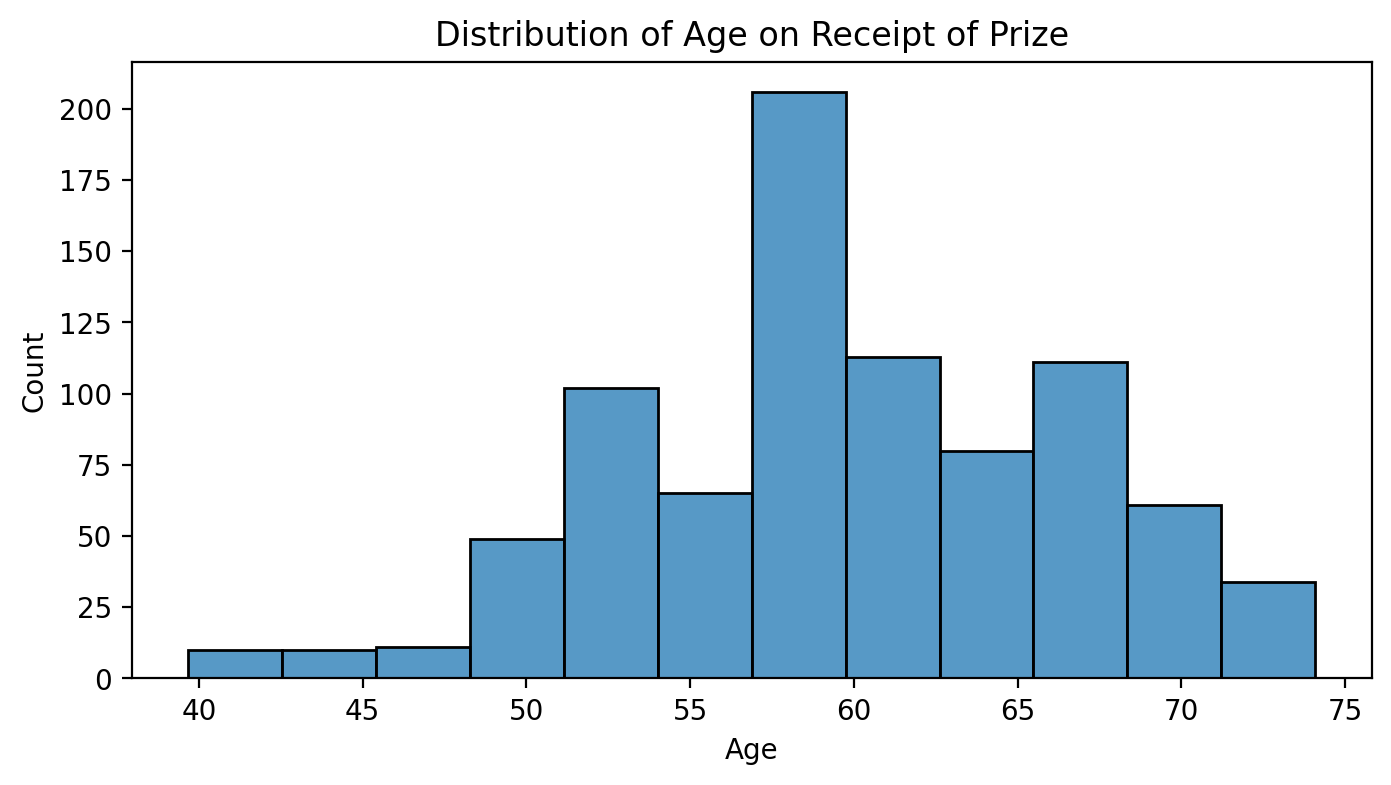

In [219]:
plt.figure(figsize=(8, 4), dpi=200)
fig9 = sns.histplot(data=year_age, x='avg_age', bins=12)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


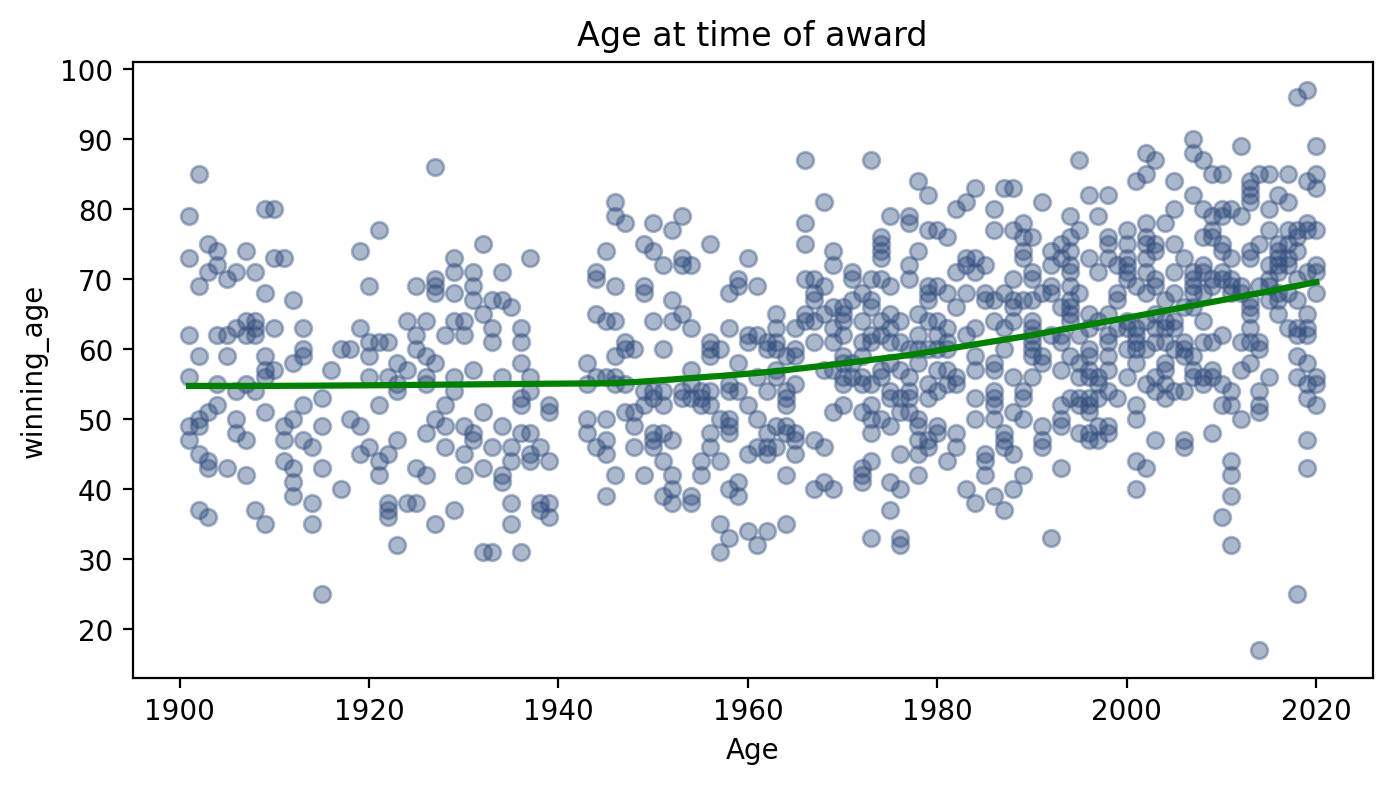

In [222]:
plt.figure(figsize=(8, 4), dpi=200)
fig10 = sns.regplot(year_age, x='year', y='winning_age', scatter_kws={'alpha': 0.4, 'color':'#2f4b7c'}, line_kws={'color': 'g'}, lowess=True)
plt.xlabel('Age')
plt.title('Age at time of award')
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

In [223]:
age_categ = df_data.groupby('category')['winning_age'].mean().reset_index()
age_categ

,category,winning_age
0,Chemistry,58.82
1,Economics,66.97
2,Literature,64.79
3,Medicine,58.58
4,Peace,60.90
5,Physics,56.44


C:\Users\PC\AppData\Local\Temp\ipykernel_22460\103410192.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




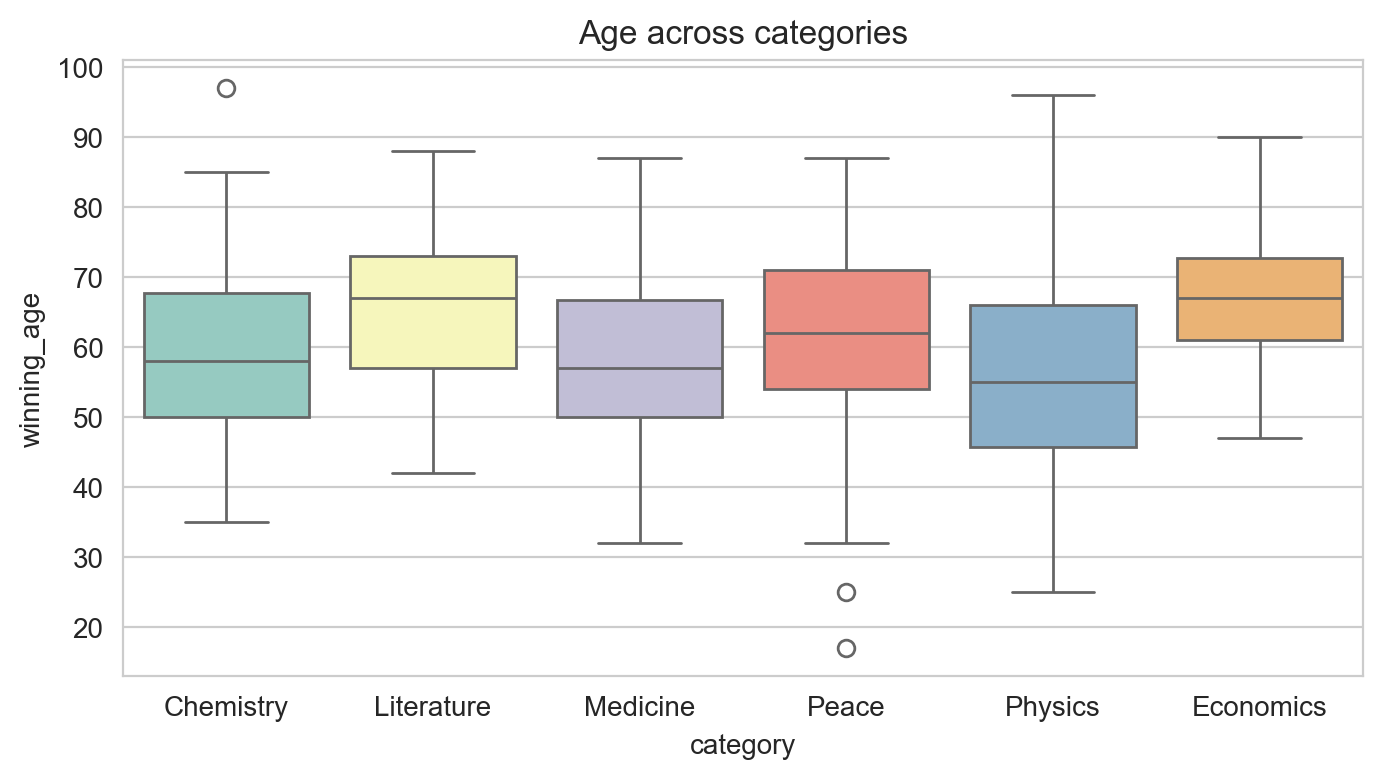

In [246]:
plt.figure(figsize=(8, 4), dpi=200)
fig11 = sns.boxplot(df_data, x='category', y='winning_age', palette='Set3')
plt.title('Age across categories')
# sns.set_style("whitegrid")
plt.show()

In [226]:
fig12 = px.box(data_frame=df_data, x='winning_age', y='category')
fig12.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


In [231]:
df_data.prize.value_counts()

prize
The Nobel Prize in Physics 2020                   3
The Nobel Prize in Physiology or Medicine 2020    3
The Nobel Prize in Physics 2016                   3
The Nobel Prize in Physiology or Medicine 2015    3
The Nobel Prize in Chemistry 2017                 3
                                                 ..
The Nobel Prize in Chemistry 1960                 1
The Nobel Peace Prize 1959                        1
The Nobel Prize in Literature 1959                1
The Nobel Prize in Physics 1901                   1
The Nobel Peace Prize 2019                        1
Name: count, Length: 602, dtype: int64

In [233]:
df_data['prize_type'] = df_data['prize'].str[:-5]
df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,share_pct1,winning_age,prize_type
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,1.00,49.00,The Nobel Prize in Chemistry
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,1.00,62.00,The Nobel Prize in Literature
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,1.00,47.00,The Nobel Prize in Physiology or Medicine
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50,0.50,79.00,The Nobel Peace Prize
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50,0.50,73.00,The Nobel Peace Prize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.33,0.33,71.00,The Nobel Prize in Physiology or Medicine
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,NaN,The Nobel Peace Prize
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.25,0.25,55.00,The Nobel Prize in Physics
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.25,0.25,68.00,The Nobel Prize in Physics


In [236]:
df_data.prize_type.value_counts()

prize_type
The Nobel Prize in Physiology or Medicine           222
The Nobel Prize in Physics                          216
The Nobel Prize in Chemistry                        186
The Nobel Peace Prize                               135
The Nobel Prize in Literature                       117
The Sveriges Riksbank Prize in Economic Sciences     86
Name: count, dtype: int64

In [235]:
df_data['prize_type'] = df_data['prize_type'].replace('The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel', 'The Sveriges Riksbank Prize in Economic Sciences')

In [237]:
prize_age_categ = df_data.groupby(['prize_type', 'category'])['winning_age'].mean().reset_index()
prize_age_categ

,prize_type,category,winning_age
0,The Nobel Peace Prize,Peace,60.90
1,The Nobel Prize in Chemistry,Chemistry,58.82
2,The Nobel Prize in Literature,Literature,64.79
3,The Nobel Prize in Physics,Physics,56.44
4,The Nobel Prize in Physiology or Medicine,Medicine,58.58
5,The Sveriges Riksbank Prize in Economic Sciences,Economics,66.97


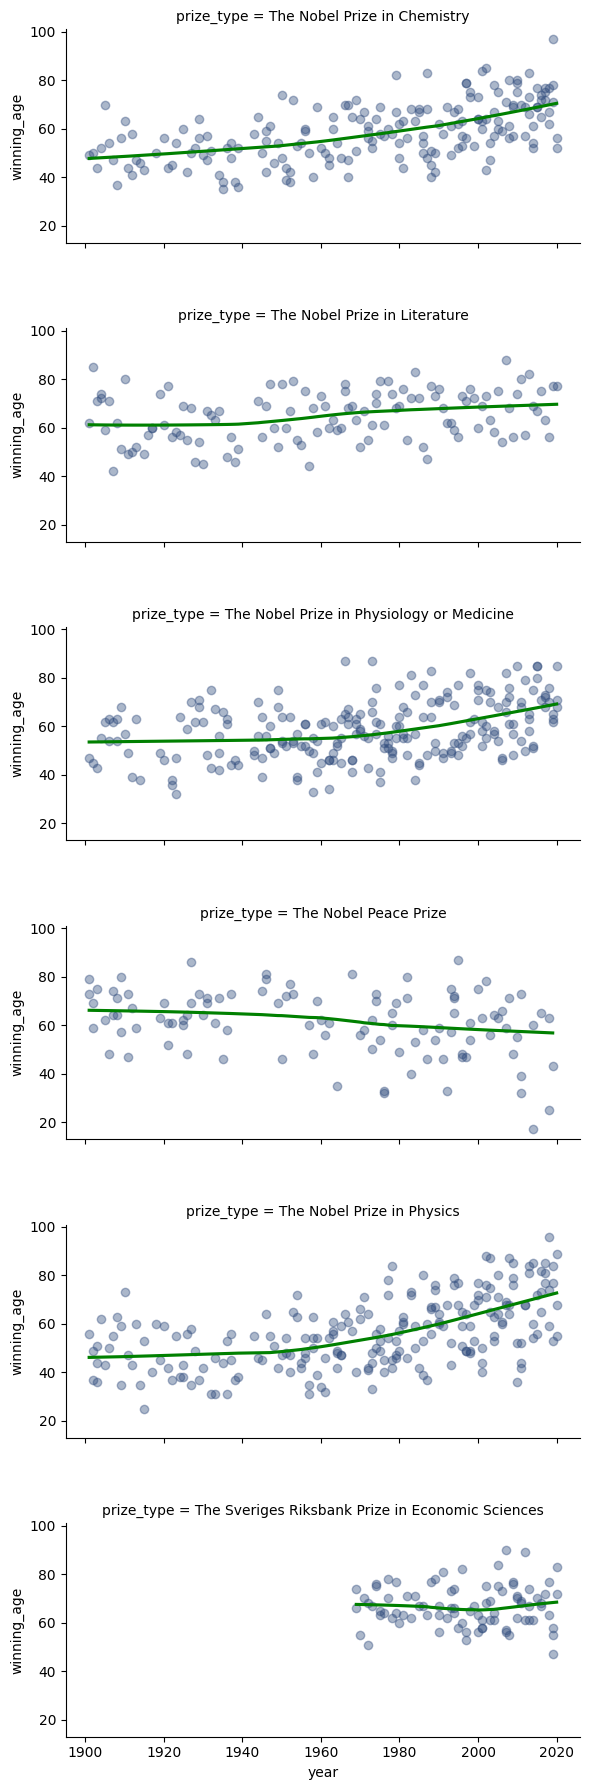

In [240]:
sns.lmplot(
    data=df_data,
    x='year',
    y='winning_age',
    row='prize_type',
    lowess=True,
    height=3,
    aspect=2,
    scatter_kws={'alpha':0.4, 'color':'#2f4b7c'},
    line_kws={'color':'g'}
)

plt.subplots_adjust(hspace=0.4)
plt.show()

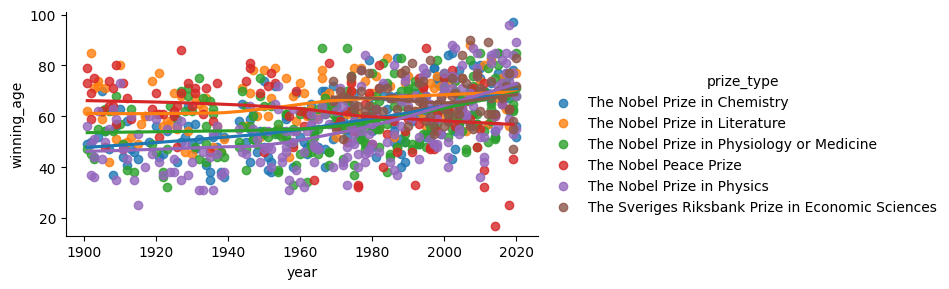

In [ ]:
sns.lmplot(
    data=df_data,
    x='year',
    y='winning_age',
    hue='prize_type',
    lowess=True,
    height=3,
    aspect=2,
)

plt.subplots_adjust(hspace=0.4)
plt.show()